# Q1

In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [8]:
target.value_counts()

Class
not donated    570
donated        178
Name: count, dtype: int64

# Q2

In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    DummyClassifier(strategy="most_frequent"),
    data,
    target,
    cv=10
)

In [11]:
print(f"{cv_results["test_score"].mean():.3f}")

0.762


# Q3

In [15]:
cv_results = cross_validate(
    DummyClassifier(strategy="most_frequent"),
    data,
    target,
    cv=10,
    scoring="balanced_accuracy"
)

In [16]:
print(f"{cv_results["test_score"].mean():.3f}")

0.500


# Q4

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

model = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [18]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'transform_input': None,
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

# Q6

In [20]:
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

cv_results = cross_validate(
    model,
    data,
    target,
    cv=10,
    scoring="balanced_accuracy",
    return_train_score=True
)

In [22]:
float(cv_results["train_score"].mean())

0.8879979500381389

In [21]:
float(cv_results["test_score"].mean())

0.4727468180254559

# Q7

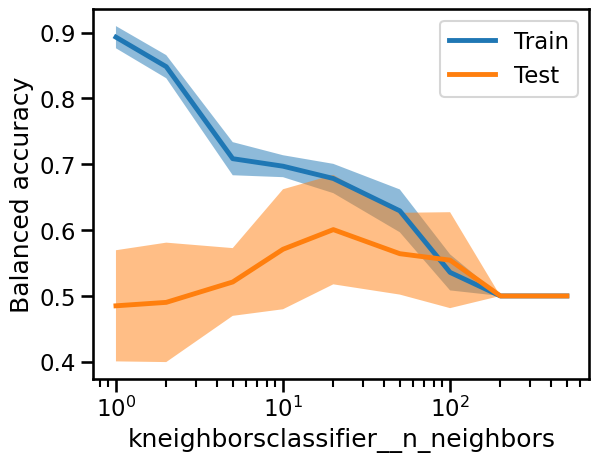

In [25]:
from sklearn.model_selection import ValidationCurveDisplay
import numpy as np
param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name="kneighborsclassifier__n_neighbors",
    param_range=param_range,
    cv=5,
    scoring="balanced_accuracy"
)